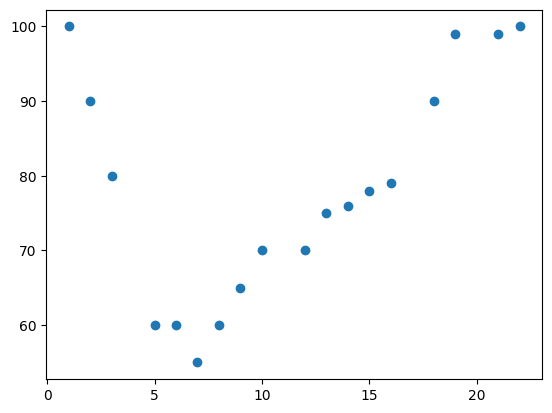

In [12]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

### Linear regression
Let's apply a linear regression model on the above dataset

In [13]:
X = np.reshape(np.array(x), (-1,1)) 

In [14]:
lin_reg = LinearRegression()
# write one line code to train the model on the dataset
lin_reg.fit(X, y)

LinearRegression()

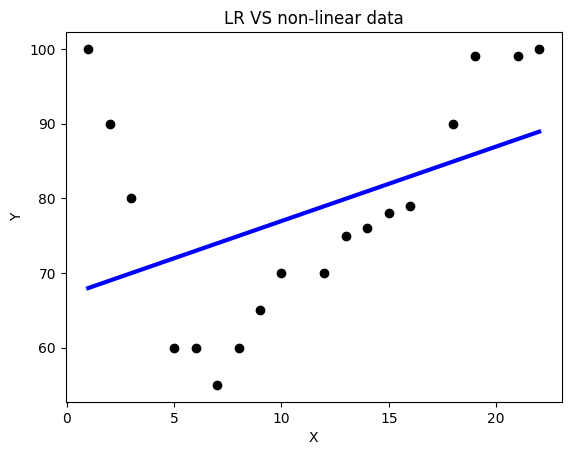

In [15]:
# write one line code to predict the dataset by the model
y_pred = lin_reg.predict(X)

plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)
plt.title("LR VS non-linear data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f"r2 score of linear regression {str(r2_score(y, y_pred))}")
print(f"mean squared error of linear regression {str(mean_squared_error(y, y_pred))}")


r2 score of linear regression 0.18231625879420676
mean squared error of linear regression 179.60776695720335


Is our model underfitting or overfitting? Why?

ANSWER: The coefficient of determination is estimated as 0.18. This value generally reflects the amount of variance in the target variable caused by the model: in other words, how well does the model predict the target variable.

Generally a value less than 0.6 ~ 0.5 is sign of a poor performance. The model is performing poorly on the training dataset, so it underfitting. We do not need to even have a test set as the a poor performance on training set means that the problem is more complex than the predictive utility of the model in question: which is the definition of underfitting.

Let's calculate the MSE to compare with the polynomial regression later.

In [17]:
# Calculate the MSE error, one line code
mse_lin_model = mean_squared_error(y, y_pred)

print("Mean squared error: %.2f" % mse_lin_model)

Mean squared error: 179.61


Now, let's try polynomial regression with different degrees

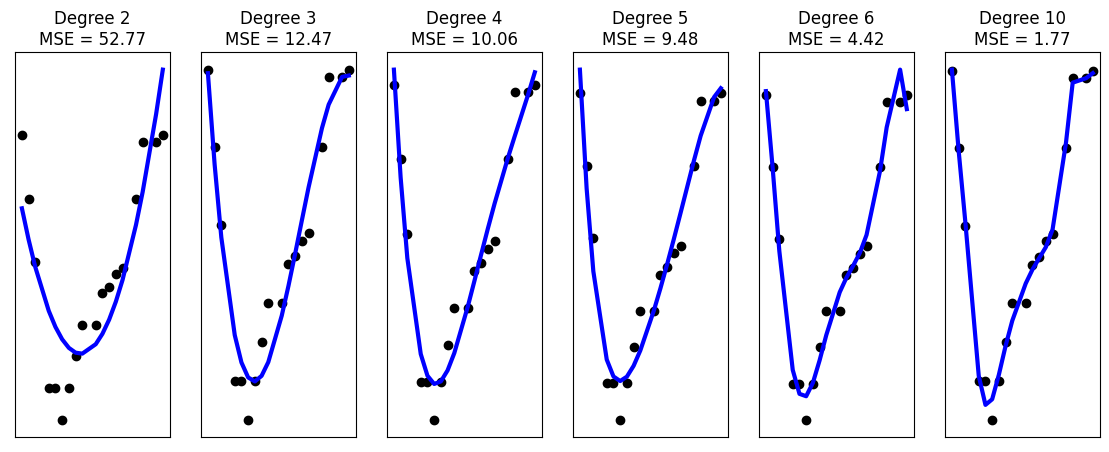

In [18]:
def train_polys(data, labels):
    degrees = [2, 3, 4, 5, 6, 10]
    plt.figure(figsize=(14, 5))

    for i in range(len(degrees)):
        degree = degrees[i]
        polynomial_features = PolynomialFeatures(degree=degree)
        linear_regression = LinearRegression()

        # write 2 lines of code to create a pipeline that contains
        #   polynomial_features and linear_regression;
        #   also fit the created pipeline on the X dataset
        
        pipe = [('polynomial feats', polynomial_features), ('linear regression', linear_regression)]
        pipeline = Pipeline(pipe)
        pipeline.fit(data, labels)

        y_pred_poly = pipeline.predict(data)

        # write one line bewlow to calculate the MSE
        mse_error_poly = mean_squared_error(labels, y_pred_poly)

        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())
        plt.scatter(data, labels, color="black")
        plt.plot(data, y_pred_poly, color="blue", linewidth=3)
        plt.title("Degree {}\nMSE = {:.2f}".format(degree, mse_error_poly))

    plt.show()
train_polys(X, y)

MSE is decreasing while we increase the number of degrees in PL, but does this mean that we can choose the PL model with the highest number of degrees?

The higher the degree of the polynomial features, the better the resulting model will fit the ***TRAINING*** dataset. Yet, the model can fit the training data so well that it cannot generalize to new unseen data. This is known as **Overfitting**. We should keep in mind, that the degree of the polynomial is a **hyperparameter**. It affects the model's performance, however, it is not learnt from the data making it a hyperparameter. Hyperparameters are  chosen through either cross validation techniques.
1. Either to have a separate dataset represeting the validation dataset.
2. or increase the size of the training data and use cross validation techniques such as KFOLD with MSE as a performance or scoring metric.
After choosing the  best hyperparameter, we can test the final model on a new unseen data: test dataset.

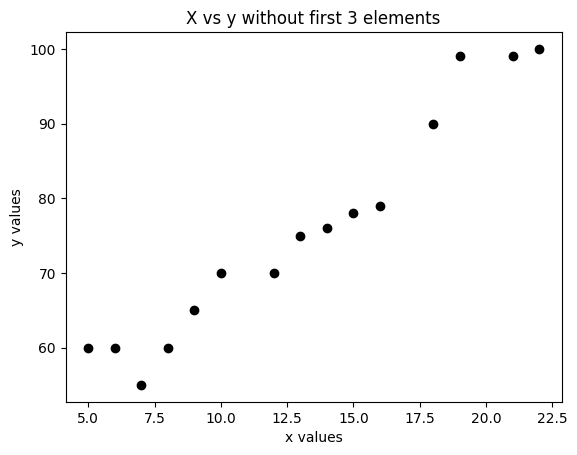

In [19]:
# let's consider the possibility that the first 3 points are indeed outliers.

X_new = X[3:]
y_new = y[3:]


plt.scatter(X_new, y_new, color="black")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('X vs y without first 3 elements')
plt.show()

In [20]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

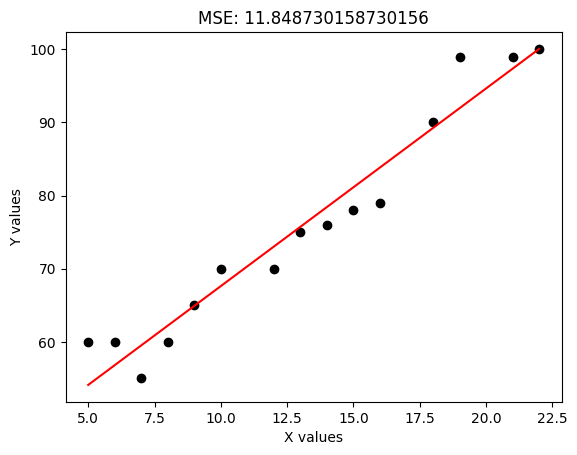

In [21]:
# before training a linear model on this data part of the dataset, it might be insightful to plot the least square line before
from scipy.stats import linregress
## Scatter plots are quite useful to better understand how one variables varies in terms of the other one
X_new = X[3:]
y_new = y[3:]
reg_line = linregress(X_new.reshape(-1, ), y_new)
reg_y = reg_line.intercept + reg_line.slope * X_new.reshape(-1, )


plt.plot(X_new.reshape(-1, ), reg_y, color='red')
plt.scatter(X_new, y_new, color='black')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title(f"MSE: {str(mean_squared_error(reg_y, y_new))}")
plt.show()

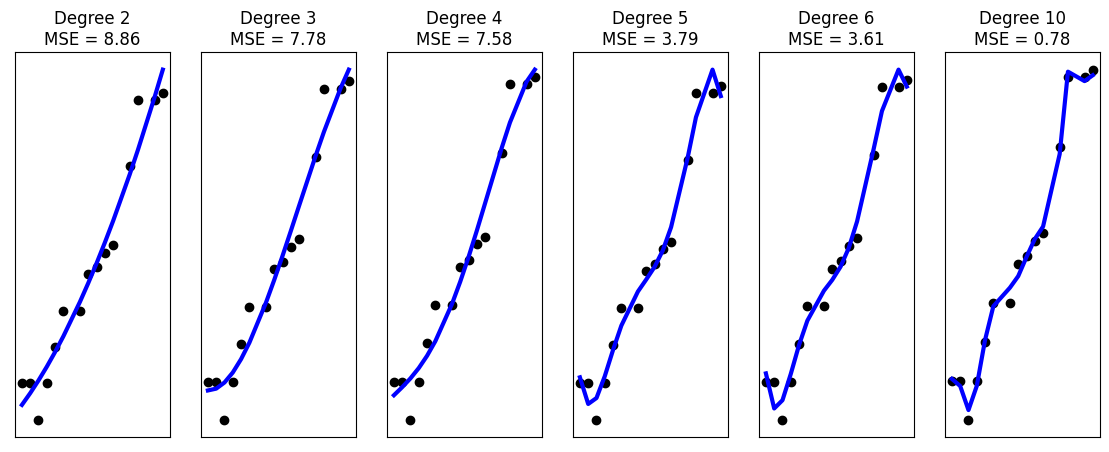

In [22]:
# let's see how well polynomial features perform on this part of the data
train_polys(X_new, y_new)

After removing the first 3 data points, the performance of linear regression with and without polynomial features is remarkably better. However, it cannot be concluded that the first 3 points are indeed outliers, as the training dataset is fairly small and there is no test dataset to evaluate / verify the assumptions introduced.

REFERENCES:
* https://www.projectpro.io/recipes/create-pipeline-sklearn 
* https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 
* https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/ 
* 